# Regression between sea level height and the dangendorf wind proxies for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [114]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs
from code import practical_functions as pf


data_type = 'era5'
model = 'Dangendorf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [115]:
# Open data file
tg_data = imprt.import_obs_slh_data()

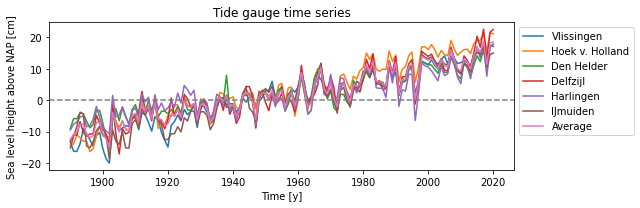

In [116]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [117]:
pres_data_era5 = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [118]:
pres_data_era5

,Negative corr region,Positive corr region
time,,
1950,100860.789062,101706.679688
1951,100909.242188,101633.406250
1952,100948.703125,101704.281250
1953,101167.054688,101741.234375
1954,100871.156250,101678.546875
...,...,...
2016,101106.015625,101755.867188
2017,100909.265625,101818.640625
2018,101164.859375,101647.007812


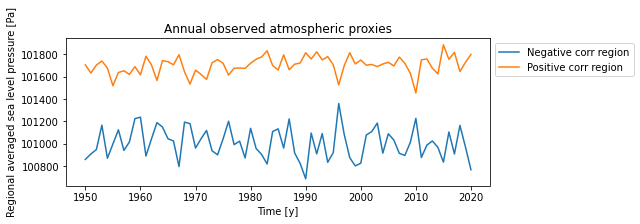

In [119]:
figs.plot_obs_pres_data(pres_data_era5, model, data_type)

### Perform regression

In [120]:
results_era5, timeseries_era5, significance_era5 = regres.regression_obs(pres_data_era5, tg_data, wind_model = model, data_type = data_type)

In [121]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.764168,0.174503,0.154780,0.173841,2.434766,7.348812,-1.332856,0.231176,3.897754
Hoek v. Holland,0.865960,0.211338,0.194433,0.201918,2.411863,9.960944,-2.059013,0.256611,5.390146
Den Helder,0.768960,0.356758,0.284348,0.315157,2.505279,6.357774,-1.776112,0.924837,3.410453
Delfzijl,0.815965,0.320313,0.241152,0.298977,2.832312,7.614678,-1.922617,1.162945,4.743198
Harlingen,0.768997,0.431238,0.384850,0.332834,2.667908,5.832838,-2.561836,0.755212,3.274528
IJmuiden,0.751630,0.283670,0.226474,0.259485,2.575060,7.142322,-1.562512,0.711764,3.598510
Average,0.834141,0.310159,0.258431,0.277852,2.243302,7.376230,-1.869149,0.673765,4.052438


In [122]:
timeseries_era5

Vlissingen                                                      \
     Negative corr region Positive corr region     trend     total wind total   
time                                                                            
1950             1.429652             0.011742 -6.656682 -5.215289   1.441393   
1951             0.955881            -0.203775 -6.466491 -5.714386   0.752106   
1952             0.570035             0.004687 -6.276301 -5.701578   0.574722   
1953            -1.564989             0.113376 -6.086110 -7.537722  -1.451612   
1954             1.328282            -0.071004 -5.895919 -4.638641   1.257278   
...                   ...                  ...       ...       ...        ...   
2016            -0.968154             0.156415  5.895919  5.084180  -0.811738   
2017             0.955652             0.341049  6.086110  7.382810   1.296701   
2018            -1.543523            -0.163769  6.276301  4.569008  -1.707293   
2019             0.331240             0.075944  6.466491  6.873676   0.407184   
2020             2.329373             0.285831  6.656682  9.271887   2.615204   

          Hoek v. Holland                                            \
     Negative corr region Positive corr region     trend      total   
time                                                                  
1950             2.208545             0.013034 -9.205427  -6.983848   
1951             1.476658            -0.226196 -8.942414  -7.691953   
1952             0.880598             0.005203 -8.679402  -7.793601   
1953            -2.417616             0.125851 -8.416390 -10.708155   
1954             2.051948            -0.078817 -8.153378  -6.180247   
...                   ...                  ...       ...        ...   
2016            -1.495617             0.173625  8.153378   6.831386   
2017             1.476304             0.378574  8.416390  10.271267   
2018            -2.384456            -0.181788  8.679402   6.113158   
2019             0.511704             0.084300  8.942414   9.538418   
2020             3.598447             0.317280  9.205427  13.121154   

                 ...             IJmuiden                                 \
     wind total  ... Negative corr region Positive corr region     trend   
time             ...                                                       
1950   2.221579  ...             1.675986             0.036152 -6.145626   
1951   1.250462  ...             1.120583            -0.627400 -5.970036   
1952   0.885801  ...             0.668254             0.014432 -5.794447   
1953  -2.291765  ...            -1.834643             0.349073 -5.618858   
1954   1.973131  ...             1.557150            -0.218614 -5.443269   
...         ...  ...                  ...                  ...       ...   
2016  -1.321992  ...            -1.134971             0.481585  5.443269   
2017   1.854877  ...             1.120314             1.050051  5.618858   
2018  -2.566244  ...            -1.809478            -0.504227  5.794447   
2019   0.596004  ...             0.388314             0.233823  5.970036   
2020   3.915727  ...             2.730733             0.880042  6.145626   

                                       Average                                 \
         total wind total Negative corr region Positive corr region     trend   
time                                                                            
1950 -4.433488   1.712138             2.004892             0.034222 -6.920855   
1951 -5.476854   0.493183             1.340493            -0.593905 -6.723116   
1952 -5.111761   0.682686             0.799397             0.013661 -6.525377   
1953 -7.104427  -1.485570            -2.194684             0.330437 -6.327638   
1954 -4.104733   1.338536             1.862735            -0.206943 -6.129900   
...        ...        ...                  ...                  ...       ...   
2016  4.789883  -0.653385            -1.357704             0.455875  6.129900   
2017  7.78

In [123]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Negative corr region,True,True,True,True,True,True,True
Positive corr region,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

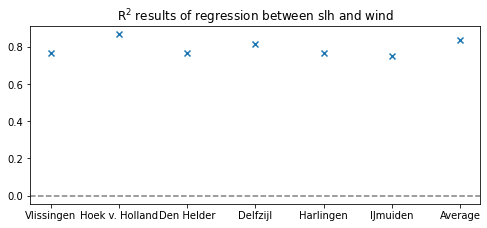

In [124]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, data_type)

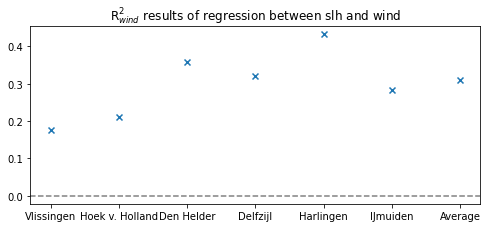

In [125]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{wind}$', model, data_type)

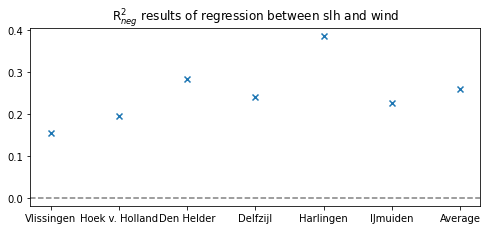

In [126]:
figs.plot_obs_result_per_station(results_era5,'R$^2_{neg}$', model, data_type)

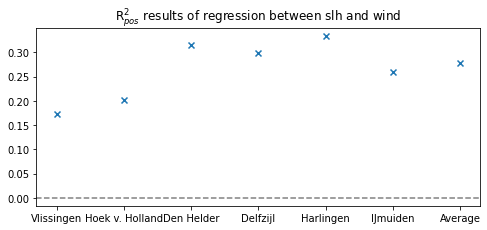

In [127]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{pos}$', model, data_type)

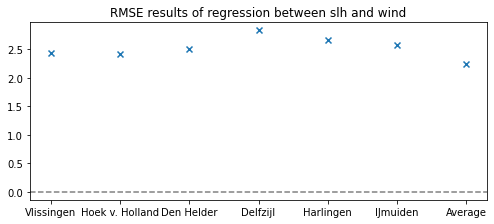

In [128]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, data_type)

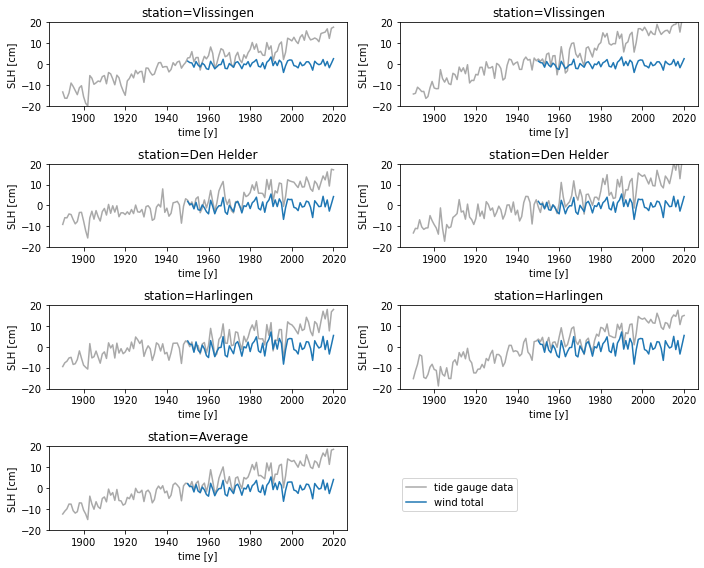

In [129]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total'], model, data_type)

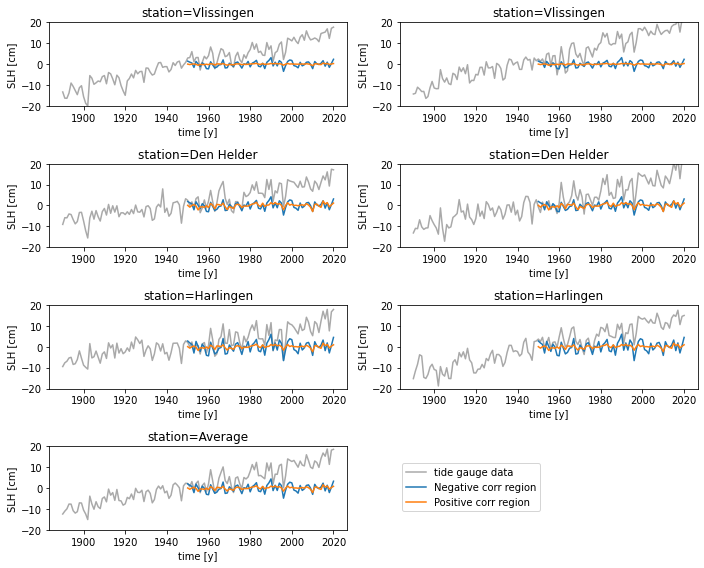

In [130]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['Negative corr region', 'Positive corr region'], model, data_type)

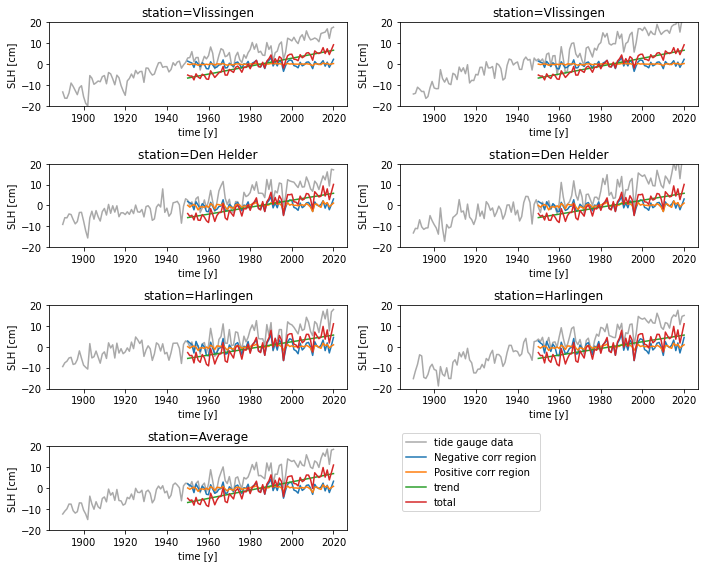

In [131]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['Negative corr region', 'Positive corr region', 'trend', 'total'], model, data_type)

#### Plot trends

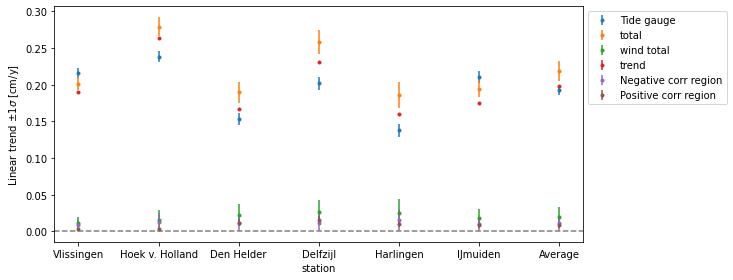

In [132]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, data_type)

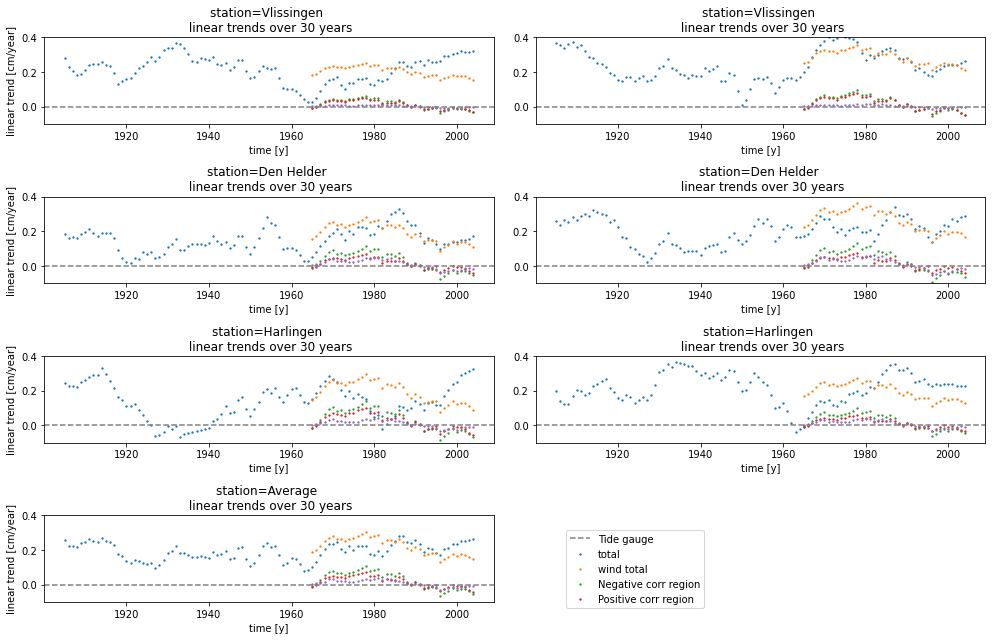

In [133]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'Negative corr region', 'Positive corr region'], 30, model, data_type, errorbar = False)

## 20cr observational data

In [134]:
data_type = '20cr'

#### Import and plot nearby wind data

In [135]:
pres_data_20cr = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [136]:
pres_data_20cr

,Negative corr region,Positive corr region
time,,
1836,101064.242188,101597.820312
1837,101291.820312,101556.539062
1838,101406.742188,101439.625000
1839,101359.046875,101497.085938
1840,101235.304688,101528.015625
...,...,...
2011,100897.171875,101706.281250
2012,100989.507812,101700.765625
2013,101064.007812,101671.875000


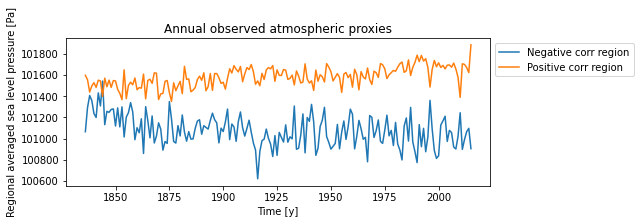

In [137]:
figs.plot_obs_pres_data(pres_data_20cr, model, data_type)

### Perform regression

In [138]:
results_20cr, timeseries_20cr, significance_20cr = regres.regression_obs(pres_data_20cr, tg_data, wind_model = model, data_type = data_type)

In [139]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.890794,0.039524,0.057610,0.183990,2.750117,-5.618788,-1.239056,-0.155093,10.999398
Hoek v. Holland,0.916811,0.123696,0.092955,0.235288,2.633923,-4.136120,-1.838975,0.296173,11.789268
Den Helder,0.826120,0.224148,0.174936,0.269444,2.632405,-2.935282,-2.050036,0.437959,7.118661
Delfzijl,0.863090,0.226506,0.154824,0.284472,2.947361,-4.383769,-2.269959,0.730591,9.287190
Harlingen,0.821551,0.369592,0.272466,0.345034,2.522358,-2.480140,-2.482835,0.922337,5.880440
IJmuiden,0.868396,0.043958,0.098682,0.168733,3.047585,-5.714893,-2.172675,-0.697708,10.897275
Average,0.908867,0.161126,0.133014,0.252686,2.250341,-4.211502,-2.008918,0.255714,9.328707


In [140]:
timeseries_20cr

Vlissingen                                             \
     Negative corr region Positive corr region      trend      total   
time                                                                   
1836             0.100988            -0.022408 -18.945967 -18.867387   
1837            -1.813688             0.045414 -18.734280 -20.502554   
1838            -2.780557             0.237497 -18.522593 -21.065653   
1839            -2.379283             0.143092 -18.310907 -20.547097   
1840            -1.338207             0.092277 -18.099220 -19.345150   
...                   ...                  ...        ...        ...   
2011             1.506596            -0.200604  18.099220  19.405212   
2012             0.729749            -0.191542  18.310907  18.849114   
2013             0.102960            -0.144076  18.522593  18.481478   
2014            -0.167908            -0.064907  18.734280  18.501466   
2015             1.447243            -0.495769  18.945967  19.897441   

                     Hoek v. Holland                                  \
     wind total Negative corr region Positive corr region      trend   
time                                                                   
1836   0.078580             0.149885             0.042792 -20.306483   
1837  -1.768274            -2.691830            -0.086725 -20.079595   
1838  -2.543059            -4.126832            -0.453535 -19.852707   
1839  -2.236191            -3.531272            -0.273255 -19.625819   
1840  -1.245930            -1.986133            -0.176215 -19.398931   
...         ...                  ...                  ...        ...   
2011   1.305993             2.236052             0.383081  19.398931   
2012   0.538207             1.083075             0.365776  19.625819   
2013  -0.041116             0.152811             0.275134  19.852707   
2014  -0.232814            -0.249204             0.123949  20.079595   
2015   0.951474             2.147962             0.946740  20.306483   

                            ...             IJmuiden                       \
          total wind total  ... Negative corr region Positive corr region   
time                        ...                                             
1836 -20.113806   0.192677  ...             0.177083            -0.100808   
1837 -22.858150  -2.778555  ...            -3.180289             0.204302   
1838 -24.433074  -4.580367  ...            -4.875687             1.068413   
1839 -23.430346  -3.804527  ...            -4.172057             0.643720   
1840 -21.561279  -2.162348  ...            -2.346536             0.415118   
...         ...        ...  ...                  ...                  ...   
2011  22.018064   2.619133  ...             2.641806            -0.902442   
2012  21.074670   1.448851  ...             1.279610            -0.861676   
2013  20.280652   0.427945  ...             0.180540            -0.648145   
2014  19.954340  -0.125255  ...            -0.294425            -0.291992   
2015  23.401185   3.094702  ...             2.537731            -2.230280   

                                                   Average  \
          trend      total wind total Negative corr region   
time                                                         
1836 -18.770064 -18.693789   0.076275             0.163736   
1837 -18.560343 -21.536331  -2.975987            -2.940587   
1838 -18.350622 -22.157896  -3.807274            -4.508200   
1839 -18.140900 -21.669238  -3.528337            -3.857603   
1840 -17.931179 -19.862597  -1.931418            -2.169675   
...         ...        ...        ...                  ...   
2011  17.931179  19.670544   1.739365             2.442690   
2012  18.140900  18.558835   0.417934             1.183164   
2013  18.350622  17.883017  -0.467605             0.166933   
2014  18.560343  17.973927  -0.586416            -0.272234   
2015  18.770064  19.077516   0.307451             2.346459   

                                                 

In [141]:
significance_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Negative corr region,True,True,True,True,True,True,True
Positive corr region,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

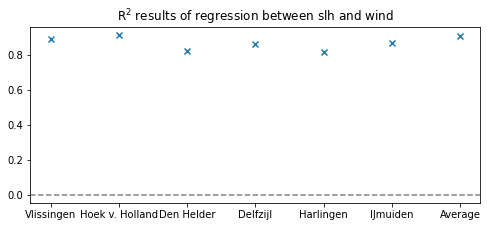

In [142]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, data_type)

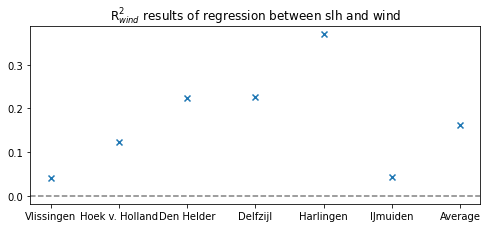

In [143]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{wind}$', model, data_type)

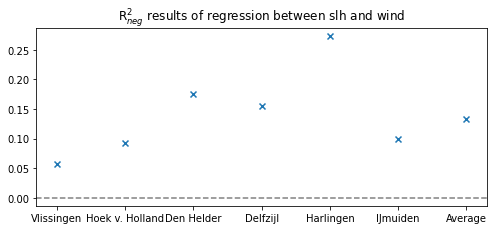

In [144]:
figs.plot_obs_result_per_station(results_20cr,'R$^2_{neg}$', model, data_type)

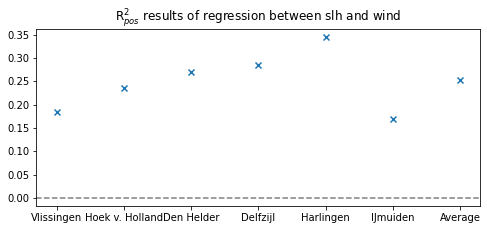

In [145]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{pos}$', model, data_type)

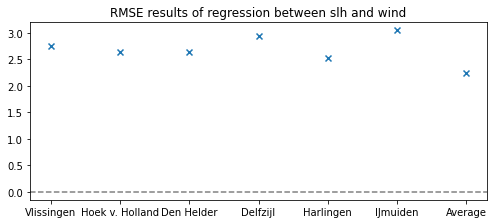

In [146]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, data_type)

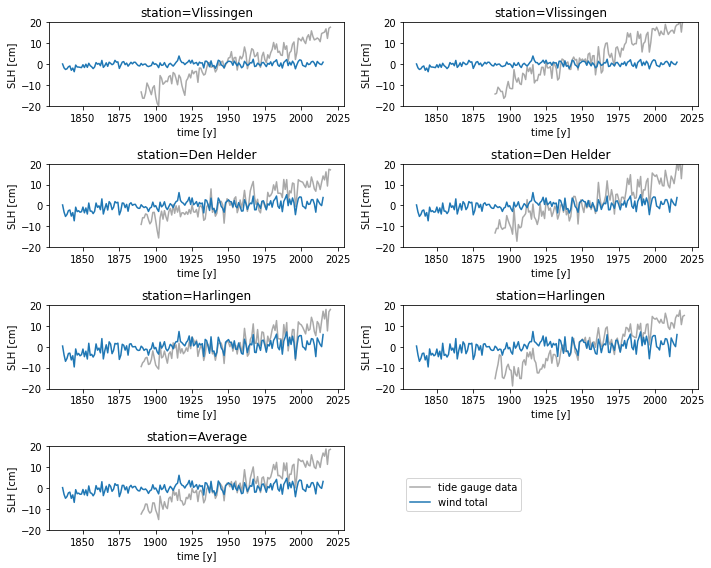

In [147]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total'], model, data_type)

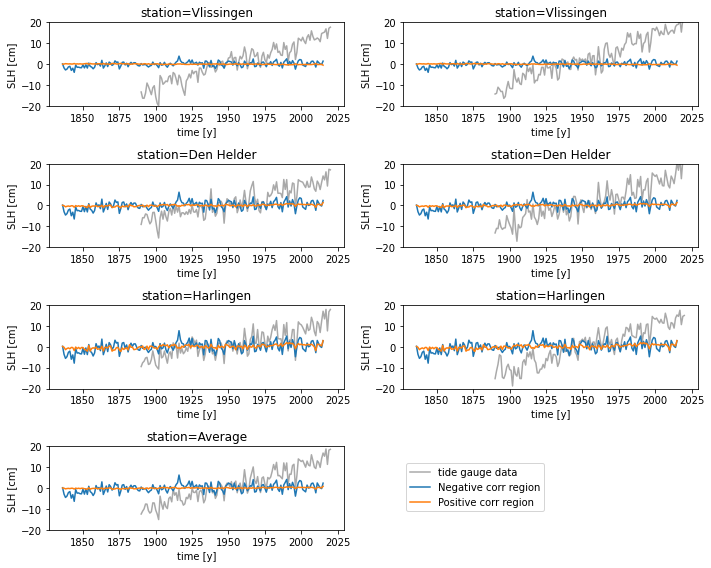

In [148]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['Negative corr region', 'Positive corr region'], model, data_type)

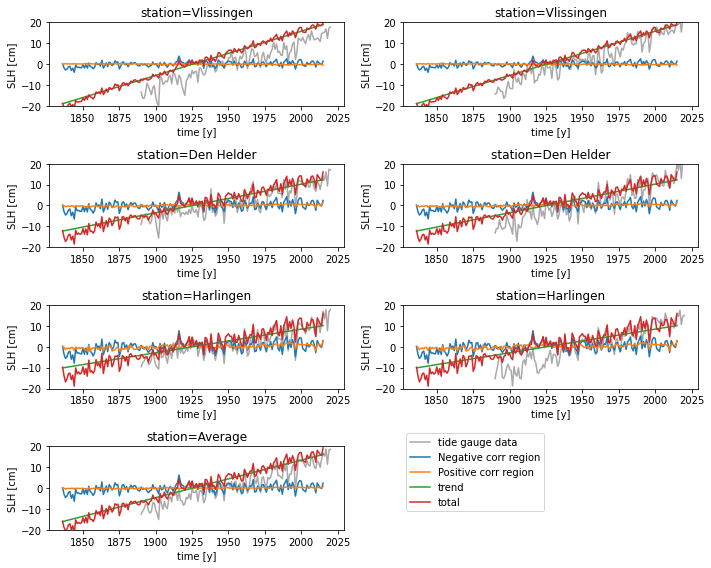

In [149]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['Negative corr region', 'Positive corr region', 'trend', 'total'], model, data_type)

#### Plot trends

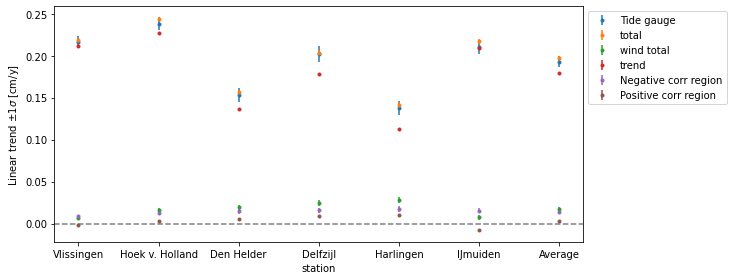

In [150]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, data_type)

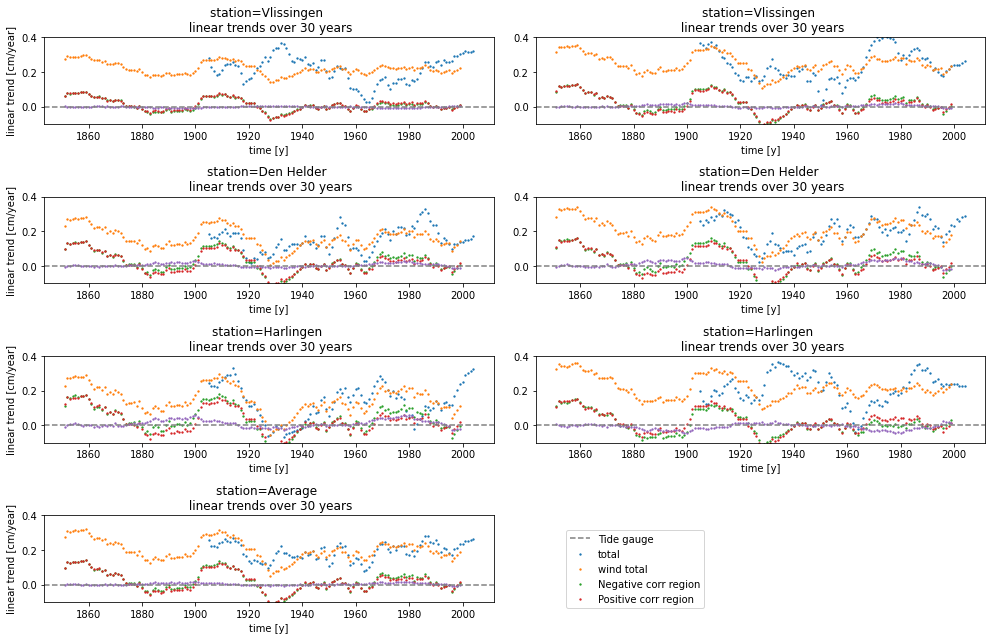

In [151]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'Negative corr region', 'Positive corr region'], 30, model, data_type, errorbar = False)